# Análisis de una Viga Continua con el Método de Elementos Finitos (MEF)
 
Este notebook demuestra cómo analizar una viga sometida a cargas transversales utilizando el MEF. El análisis de vigas es fundamental en ingeniería estructural.

Características clave del elemento de viga:
- Cada nodo tiene **dos grados de libertad**: el desplazamiento vertical ('y') y la rotación o giro alrededor del eje z ('eje_z').
- La matriz de rigidez de cada elemento es de 4x4 y se deriva de la teoría de vigas de Euler-Bernoulli.


**Problema:**
 
El siguiente ejemplo, basado en el libro *A First Course in the Finite Element Method* de Daryl L. Logan, analiza la viga continua de cuatro tramos mostrada a continuación. Se busca determinar los desplazamientos y giros nodales, las reacciones en los apoyos y los diagramas de fuerza cortante, momento flector, giro y deflexión.

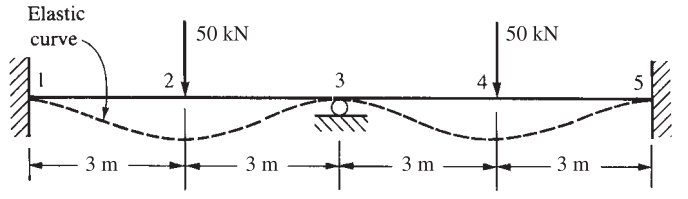

In [1]:
from mnspy import Nodo, Viga, Ensamble
import sympy as sp

### Paso 1: Definición de los Nodos

Se crean los nodos del sistema, especificando su coordenada `x` y sus condiciones de frontera.
- `{'y': False, 'eje_z': False}`: Apoyo empotrado (restringe desplazamiento y giro).
- `{'y': False, 'eje_z': True}`: Apoyo simple o de rodillo (restringe desplazamiento, permite giro).
- `{'y': True, 'eje_z': True}`: Nodo libre.

In [2]:
n_1= Nodo('1', 0, grados_libertad={'y': False, 'eje_z': False})
n_2= Nodo('2', 3, grados_libertad={'y': True, 'eje_z': True})
n_3= Nodo('3', 6, grados_libertad={'y': False, 'eje_z': True})
n_4= Nodo('4', 9, grados_libertad={'y': True, 'eje_z': True})
n_5= Nodo('5', 12, grados_libertad={'y': False, 'eje_z': False})

### Paso 2: Definición de los Elementos (Vigas)

Se crean los elementos tipo `Viga`, especificando su ID, los nodos que conecta, el Momento de Inercia de su sección transversal `I` y su Módulo de Young `E`.

In [3]:
e_1 = Viga('1', n_1, n_2, I=2E-4, E=210E6)
e_2 = Viga('2', n_2, n_3, I=2E-4, E=210E6)
e_3 = Viga('3', n_3, n_4, I=2E-4, E=210E6)
e_4 = Viga('4', n_4, n_5, I=2E-4, E=210E6)

### Paso 3: Aplicación de Cargas Externas

Se aplican las fuerzas puntuales en los nodos correspondientes.

In [4]:
n_2.agregar_fuerza_externa(-50,'y')
n_4.agregar_fuerza_externa(-50,'y')

### Paso 4: Matrices de Rigidez de los Elementos

Cada elemento `Viga` tiene una matriz de rigidez de 4x4 que relaciona las fuerzas y momentos con los desplazamientos y giros en sus nodos.

In [5]:
e_1

Viga: 1

In [6]:
e_2

Viga: 2

In [7]:
e_3

Viga: 3

### Paso 5: Ensamble del Sistema

Se crea un objeto `Ensamble` que agrupa todos los elementos y se visualiza el problema.

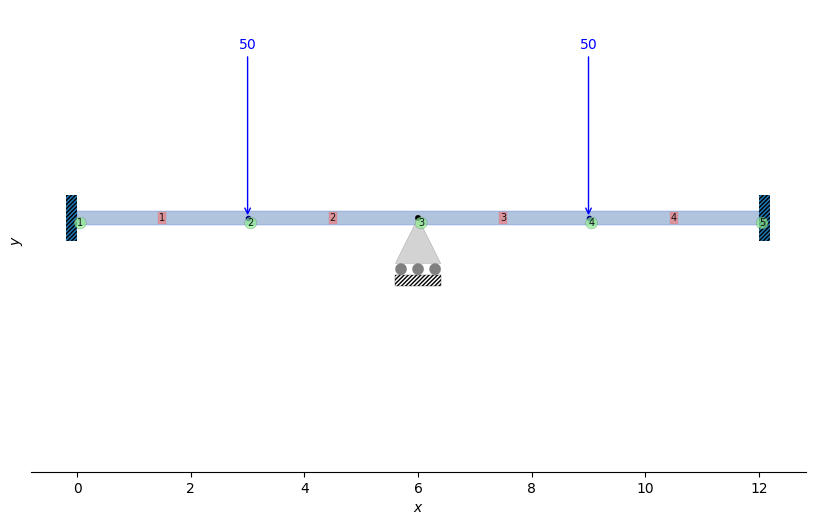

In [8]:
mg = Ensamble([e_1, e_2, e_3, e_4])
mg.diagrama_cargas()

### Paso 6: Matriz de Rigidez Global y Reducida

El ensamble construye la matriz de rigidez global del sistema completo. Luego, se extrae la matriz reducida que corresponde únicamente a los grados de libertad desconocidos.

In [9]:
print("--- Matriz de Rigidez Global ---")
mg

--- Matriz de Rigidez Global ---


In [10]:
print("--- Matriz de Rigidez Global Reducida ---")
mg.matriz_global_reducida()

--- Matriz de Rigidez Global Reducida ---


<IPython.core.display.Math object>

### Paso 7: Solución del Sistema

Se resuelve el sistema `[K]{u} = {F}` para encontrar los desplazamientos y giros desconocidos, y luego se calculan las fuerzas y momentos de reacción.

In [11]:
mg.solucionar_por_gauss_y_calcular_reacciones()
# El método `solucion()` muestra los desplazamientos y giros calculados.
mg.solucion()

Desplazamientos,Reacciones
$v_{1}=0$,$\color{blue}F_{1y}=25$
$\phi_{1}=0$,$\color{blue}M_{1}=37.5$
$\color{blue}v_{2}=-0.001339285714$,$\cancel{F_{2y}}$
$\color{blue}\phi_{2}=0$,$\cancel{M_{2}}$
$v_{3}=0$,$\color{blue}F_{3y}=50$
$\color{blue}\phi_{3}=0$,$\cancel{M_{3}}$
$\color{blue}v_{4}=-0.001339285714$,$\cancel{F_{4y}}$
$\color{blue}\phi_{4}=0$,$\cancel{M_{4}}$
$v_{5}=0$,$\color{blue}F_{5y}=25$
$\phi_{5}=0$,$\color{blue}M_{5}=-37.5$


In [12]:
# Al mostrar el objeto `Ensamble` de nuevo, se puede ver el estado completo del sistema, incluyendo los resultados.
mg

### Paso 8: Post-procesamiento
 
Una vez resuelto el sistema, se pueden obtener los resultados de ingeniería más importantes: los diagramas de esfuerzos y la deformada.
#### 8.1 Diagramas de Cortante, Momento, Giro y Deflexión

El objeto `Ensamble` puede generar los diagramas para toda la viga continua.

--- Diagrama de Fuerza Cortante (V) ---


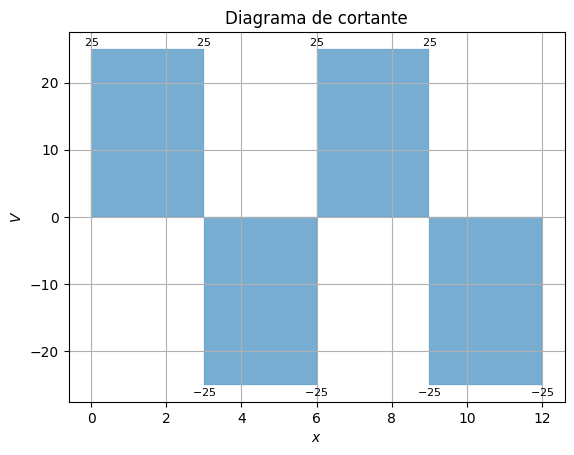

In [13]:
print("--- Diagrama de Fuerza Cortante (V) ---")
mg.diagrama_de_cortante()

--- Diagrama de Momento Flector (M) ---


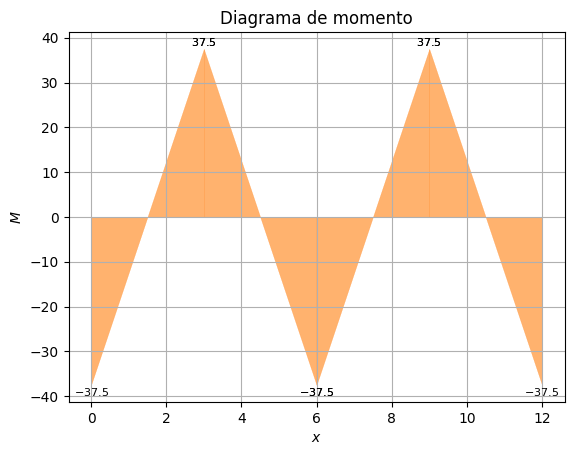

In [14]:
print("--- Diagrama de Momento Flector (M) ---")
mg.diagrama_de_momento()

--- Diagrama de Giro (θ) ---


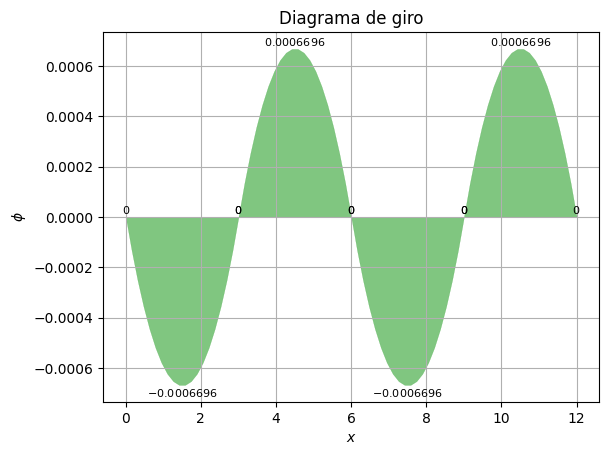

In [15]:
print("--- Diagrama de Giro (θ) ---")
mg.diagrama_de_giro()

--- Diagrama de Deflexión (y) ---


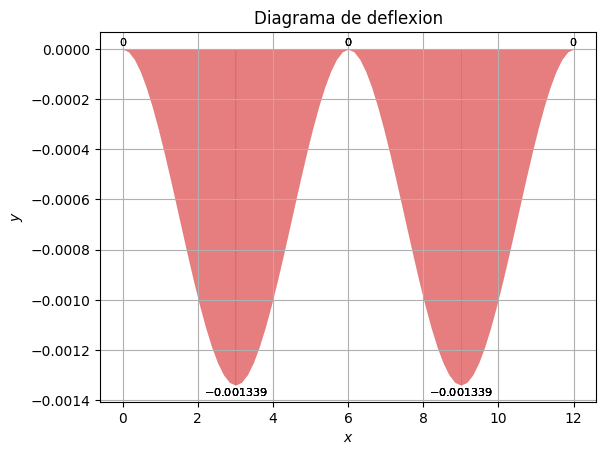

In [16]:
print("--- Diagrama de Deflexión (y) ---")
mg.diagrama_de_deflexion()

#### 8.2 Ecuaciones Internas y Evaluación

Los diagramas anteriores se basan en ecuaciones simbólicas (polinomios cúbicos) para cada tramo. Podemos acceder a estas ecuaciones y evaluarlas en cualquier punto.

--- Ecuaciones para el Elemento 1 (Tramo 1) ---
Ecuación de Cortante V(x):


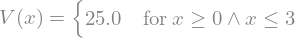

In [17]:
print("--- Ecuaciones para el Elemento 1 (Tramo 1) ---")
print("Ecuación de Cortante V(x):")
e_1.ecuacion_de_cortante()

Ecuación de Momento M(x):


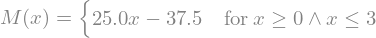

In [18]:
print("Ecuación de Momento M(x):")
e_1.ecuacion_de_momento()

Ecuación de Giro θ(x):


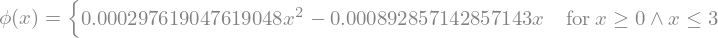

In [19]:
print("Ecuación de Giro θ(x):")
e_1.ecuacion_de_giro()

Ecuación de Deflexión y(x):


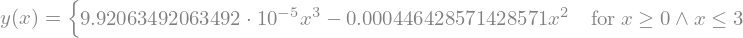

In [20]:
print("Ecuación de Deflexión y(x):")
e_1.ecuacion_de_deflexion()

Podemos usar la ecuación de deflexión de toda la viga (`mg.ecuacion_de_deflexion()`) para encontrar el desplazamiento en puntos específicos, como en los nodos 2 (x=3) y 3 (x=6).


In [21]:
x = sp.symbols('x')
deflexion_viga = mg.ecuacion_de_deflexion()
 
deflexion_en_x3 = deflexion_viga.subs(x, 3).rhs
print(f"La deflexión en x=3 m es: {deflexion_en_x3:.6f} m")

La deflexión en x=3 m es: -0.001339 m


In [22]:
deflexion_en_x6 = deflexion_viga.subs(x, 6).rhs
print(f"La deflexión en x=6 m es: {deflexion_en_x6:.6f} m (corresponde al apoyo, por lo que es cero)")

La deflexión en x=6 m es: 0.000000 m (corresponde al apoyo, por lo que es cero)


#### 8.3 Fuerzas Internas Nodales

Podemos inspeccionar las fuerzas (cortante) y momentos en los nodos de cada elemento individual.

In [23]:
print("--- Fuerzas y Momentos en los nodos del Elemento 1 ---")
e_1.fuerzas_internas()

--- Fuerzas y Momentos en los nodos del Elemento 1 ---


,Fuerzas internas
$f^{(1)}_{1y}$,25
$m^{(1)}_{1}$,37.5
$f^{(1)}_{2y}$,-25
$m^{(1)}_{2}$,37.5


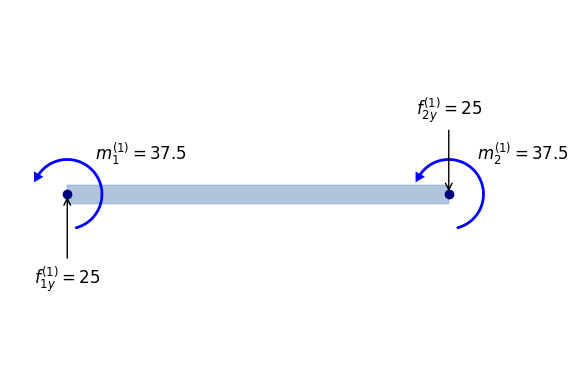

In [24]:
e_1.diagrama_fuerzas_internas()

In [25]:
print("--- Fuerzas y Momentos en los nodos del Elemento 2 ---")
e_2.fuerzas_internas()

--- Fuerzas y Momentos en los nodos del Elemento 2 ---


,Fuerzas internas
$f^{(2)}_{2y}$,-25
$m^{(2)}_{2}$,-37.5
$f^{(2)}_{3y}$,25
$m^{(2)}_{3}$,-37.5


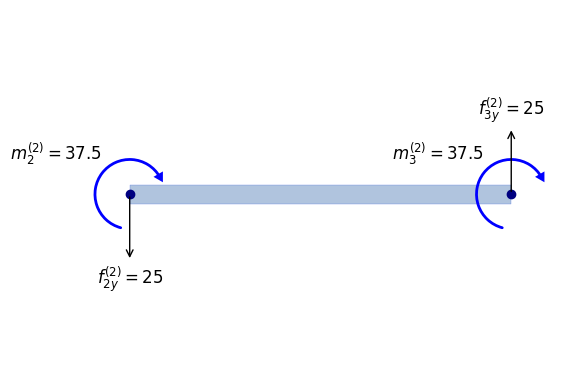

In [26]:
e_2.diagrama_fuerzas_internas()

In [27]:
print("--- Fuerzas y Momentos en los nodos del Elemento 3 ---")
e_3.fuerzas_internas()

--- Fuerzas y Momentos en los nodos del Elemento 3 ---


,Fuerzas internas
$f^{(3)}_{3y}$,25
$m^{(3)}_{3}$,37.5
$f^{(3)}_{4y}$,-25
$m^{(3)}_{4}$,37.5


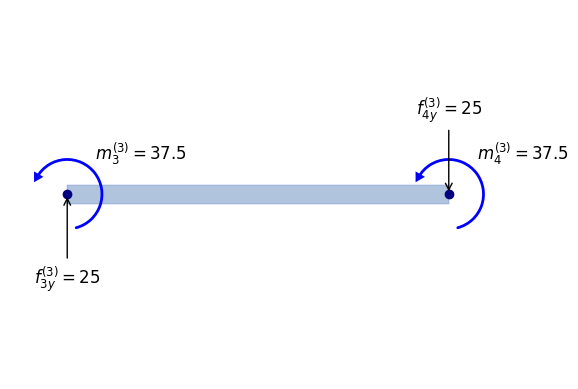

In [28]:
e_3.diagrama_fuerzas_internas()

In [29]:
print("--- Fuerzas y Momentos en los nodos del Elemento 4 ---")
e_4.fuerzas_internas()

--- Fuerzas y Momentos en los nodos del Elemento 4 ---


,Fuerzas internas
$f^{(4)}_{4y}$,-25
$m^{(4)}_{4}$,-37.5
$f^{(4)}_{5y}$,25
$m^{(4)}_{5}$,-37.5


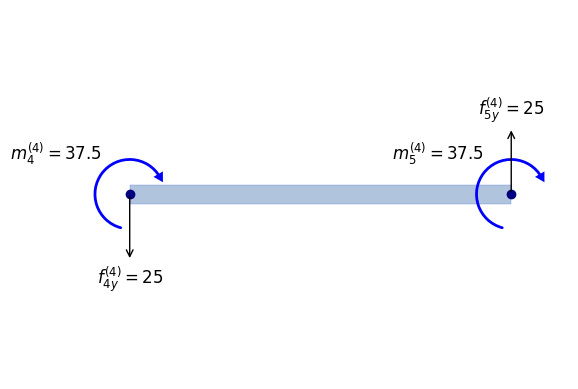

In [30]:
e_4.diagrama_fuerzas_internas()

#### 8.4 Visualización de la Deformada

Finalmente, se puede graficar la forma deformada de la viga. Los desplazamientos reales suelen ser muy pequeños, por lo que se amplifican con un `factor de magnificación` para que la deformación sea visible.

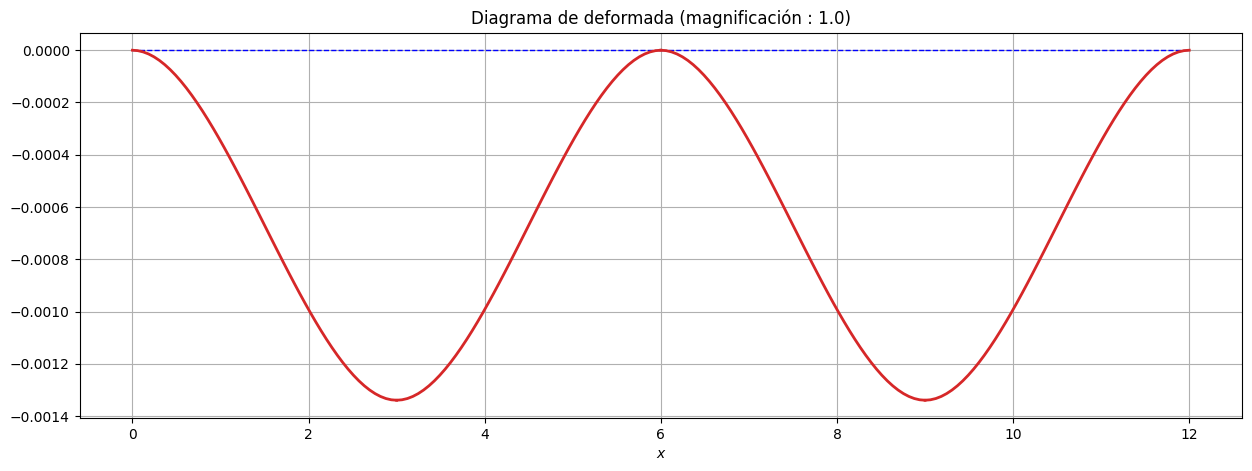

In [31]:
mg.deformada()